In [62]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Introduction
In this first part of the tutorial, we're going to quickly cover Bayesian linear regression.  We will assume you already know what linear regression  and the basics of the Bayesian methodology is. We place this demo here to get you used to the PyMC3 syntax.

## The model
For simple linear regression, the model can be specified mathematically as: 
$$ 
y \sim \mathcal{N}(\mu = \alpha + \beta x, \sigma = \epsilon)
$$
Where $(x_i, y_i)$ are the data, $\mu$ is the predicted mean value and $\sigma$ the error.  

We will learn $\alpha, \beta$ and $\epsilon$ from the data. 

## Priors
We shall have Normal priors over $\alpha$ and $\beta$ and a half-Cauchy over the error term. 

In [3]:
# alpha prior
mu_alpha = 0
sd_alpha = 10
# beta prior
mu_beta = 0
sd_beta = 1
# epsilon prior
eps = 5


## The data

In [67]:
np.random.seed(314)
N = 1000
alpha_real = 2.5
beta_real = 0.9
eps_real = 0.5
eps_real_all = np.random.normal(0, eps_real, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real_all

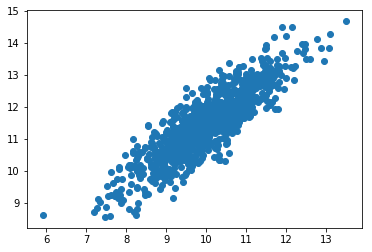

In [68]:
plt.scatter(x, y)

## Conditioning the model



In [69]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=mu_alpha, sd=sd_alpha)    
    beta = pm.Normal('beta', mu=mu_beta, sd=sd_beta)
    epsilon = pm.HalfCauchy('epsilon', eps)

    y_pred = pm.Normal('y_pred', mu=alpha + beta * x, sd=epsilon, observed=y)
    
    trace = pm.sample(5000, tune=500)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon_log__, beta, alpha]
Could not pickle model, sampling singlethreaded.
Sequential sampling (2 chains in 1 job)
NUTS: [epsilon_log__, beta, alpha]
100%|██████████| 5500/5500 [00:38<00:00, 143.72it/s]
The acceptance probability does not match the target. It is 0.892031354761052, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c16e04fd0>,
      dtype=object)

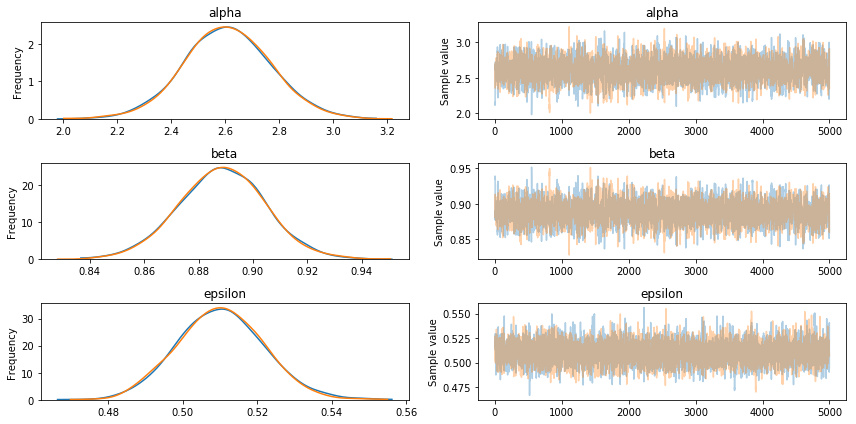

In [70]:
pm.traceplot(trace)

## Inspect the model

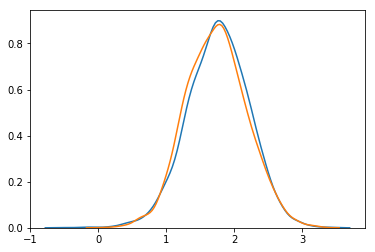

In [65]:
sns.distplot(trace.get_values(varname='alpha', chains=0), hist=False)
sns.distplot(trace.get_values(varname='alpha', chains=1), hist=False)

In [66]:
model.plot()

AttributeError: 'Model' object has no attribute 'plot'